#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 2
#### Topics:
- Probability review
- Distributional Properties of the Linear Model


#### Due: 05/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

**Name**: Ofir Nesher

**Student ID**: 204502926

**Date**: 26/03/22

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$

<hr>
<hr>

## Problem 1 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $Z_1+Z_2+Z_3+Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$.

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = AZ$ and $Y = BZ$ for non-random matrices $A$ and $B$. Find conditions on $A$ and $B$ such that $X$ independent of $Y$.

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & .25 \\
.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivaraite normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a scatter plot. 

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 0 \leq y \leq 2x\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. By evaluating the integral over the Gaussian density function
    2. By estimating the fraction of samples in 4 that falls in the region $A$


### **Answers**:

#### 1.
$Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$

Let's write it in matrix form:
$$
Z =
\begin{bmatrix}
Z_1 \\
Z_2 \\
Z_3 \\
Z_4 \\
Z_5 \\
Z_6 \\
Z_7 \\
Z_8 \\
Z_9
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 
\mu_1 \\
\mu_2\\
\mu_3\\
\mu_4\\
\mu_5\\
\mu_6\\
\mu_7\\
\mu_8\\
\mu_9
\end{bmatrix}, \begin{bmatrix}
 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
\right)
$$

And as seen in class, $Z_1$ and $Z_2$ are independent if Cov($Z_1$, $Z_2$) = Σ12 = 0<br>
Therefore, each pair of $Z_i$ is independent from $Z_j$  (i != j)

Each sum $Z_1+Z_2+Z_3+Z_4$ and $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$ is Normal (see [here](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#:~:text=the%20sum%20of%20two%20independent%20normally%20distributed%20random%20variables%20is%20normal)).

We also know (from class) that $\operatorname{Cov}(A X, B Y)=A \operatorname{Cov}(X, Y) B^{\top}$, and that by linearity of COV:
$$
Cov(Z_1+Z_2+Z_3+Z_4, Z_1 + Z_2 - Z_3 - Z_4 - Z_5) =
$$
$$
Cov(Z_1,Z_1) + Cov(Z_1,Z_2) - Cov(Z_1,Z_3) - Cov(Z_1,Z_4) - Cov(Z_1,Z_5) + Cov(Z_2,Z_1) + Cov(Z_2,Z_2) - Cov(Z_2,Z_3) - Cov(Z_2,Z_4) - Cov(Z_2,Z_5) + Cov(Z_3,Z_1) + Cov(Z_3,Z_2) - Cov(Z_3,Z_3) - Cov(Z_3,Z_4) - Cov(Z_3,Z_5) + Cov(Z_4,Z_1) + Cov(Z_4,Z_2) - Cov(Z_4,Z_3) - Cov(Z_4,Z_4) - Cov(Z_4,Z_5) =
$$
$$
1 + 0 - 0 - 0 - 0 + 0 + 1 - 0 - 0 - 0 + 0 + 0 - 1 - 0 - 0 + 0 + 0 - 0 - 1 - 0 =
$$
$$
0
$$

And for normal RVs - uncorrelatedness implies independence.

So the sums are independent.

#### 2.
$Z \sim \Ncal(\mu, I_n)$ and $X = AZ$ and $Y = BZ$<br>
$X \sim \Ncal(A\mu, A I_n A^T)$ and $Y \sim \Ncal(B\mu, B I_n B^T)$

<!-- In order for X to be independent of Y we want A to be a matrix of size $m_1$ X n and B to be a matrix of size $m_2$ X n such that we get: -->

$
X \sim \Ncal(A\mu, A I_n A^T) ==> X \sim \Ncal(A\mu, A A^T)
$
and similarly $Y \sim \Ncal(B\mu, B B^T)$

($A_{m_1 X n}$ and $B_{m_2 X n}$)

We want X and Y to be independent, and (as stated in section 1 and in class) for normal RVs - **uncorrelatedness implies independence** so we want to show that COV(X,Y) == 0.<br>
We also saw in class that for non-random matrices A & B, $\operatorname{Cov}(A Z, B Z)=A \operatorname{Cov}(Z, Z) B^{\top} = A Var(Z) B^{\top} = A I B^{\top} = A B^{\top}$

So COV(X,Y) = 0 when $A B^{\top} = 0$ and that will satisfy X and Y to be independent.

#### 3.
##### a. Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$?

$
Cov(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j}) = 
Cov(\frac{1}{J} \sum_{j=1}^J Z_{ij}, \frac{1}{I} \sum_{i=1}^I Z_{ij}) = 
\frac{1}{J} Cov(\sum_{j=1}^J Z_{ij}, \sum_{i=1}^I Z_{ij})\frac{1}{I} = 
\frac{1}{J} Cov(z_{ij}, z_{ij})\frac{1}{I} = 
\frac{1}{J} Var(z_{ij})\frac{1}{I} = 
\frac{1}{JI} \neq 0
$

If they were ind., their Cov would be 0, so they are not ind.


##### b. Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$?
Same as before, 

$
Cov(\bar{Z}_{1 \bullet}, \bar{Z}_{2 \bullet}) = 
Cov(\frac{1}{J} \sum_{j=1}^J Z_{1j}, \frac{1}{J} \sum_{j=1}^J Z_{2j})
$

Every pair $z_{ij}, z_{i'j'}$ is independent (where $i \neq i' and j \neq j'$) - there are no common variables so all covariances cancel out and we get 0 as the final result (again "for normal RVs - uncorrelatedness implies independence").


##### c. Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$?
From $cov(\bar{Z}{i\bullet} - \bar{Z}{\bullet \bullet}, \bar{Z}_{i\bullet})$ we get no common variables between the 2 terms:<br>
On the left, we are left with ALL the terms $\in \bar{Z}_{\bullet \bullet}$ which are not $\in \bar{Z}_{i\bullet}$ with a negative sign (we take $\bar{Z}_{i\bullet}$ and subtract all possible $z_{ij}$ from it).

And as in section b, every pair $z_{ij}, z_{i'j'}$ is independent and the Cov have no terms in common so cov == 0 and therefore $(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet})$, $\bar{Z}_{i\bullet}$ are independent.

#### 4.

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams.update({'font.size': 18})
%matplotlib inline

In [78]:
mux = 0
muy = 0
rho = .25
sigX = 1
sigY = 1
mu = np.array([[mux, muy]])
Sig = np.array([[sigX ** 2, rho * sigX * sigY],  #desired covariance matrix
                [rho * sigX * sigY, sigY ** 2]])
A = np.linalg.cholesky(Sig)  # "matrix square root" of Sig

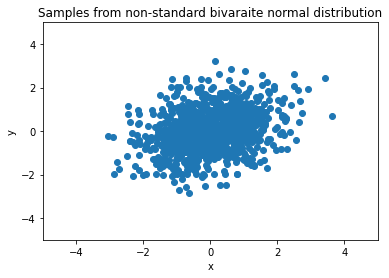

In [79]:
n = 1000
z = np.random.randn(2, n)
x, y = mu.T + np.dot(A, z)

plt.scatter(x, y)
plt.title("Samples from non-standard bivaraite normal distribution")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

#### 5.

I don't understand what should be done here, honestly.<br>
Maybe I didn't understand the instructions or we didn't discuss it in class.

I assume we need to solve something around this somehow:

$\Pr\left[ (X_1, X_2) \in A \right] = \int_{A} \int f_{X_1 X_2}\left(x_1, x_2\right) d x_1 d x_2 = \int_{-\infty}^{x_1} \int_{-\infty}^{x_2} f_{X_{1} X_{2}}(x_1, x_2) d x_1 d x_2$

Where $f_{X_{1} X_{2}}(x_1, x_2) = \frac{1}{(2 \pi)^{m / 2} \sqrt{|\Sigma|}} \exp \left(-\frac{1}{2}(X-\mu)^{T} \Sigma^{-1}(X-\mu)\right) = $
$\frac{1}{(2 \pi)^{m / 2} \sqrt{|\Sigma|}} \exp \left(-\frac{1}{2}(X)^{T} \Sigma^{-1}(X)\right)$

<hr>

## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$


For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & 1 & 3 \\
 1 & 2 & 3 \\
 3 & 3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=2, X=3)$

### **Answers**:

#### 1.

$$
\rho 2 \sqrt{2} = 1
$$

$$
\rho = \frac{1}{2 \sqrt{2}}
$$

The conditional distribution of X given Y=1 is:
$$
\mathcal{L}(X \mid Y = 1) \sim \mathcal{N}\left(\mu_{x}+\rho \sigma_{x} \frac{Y-\mu_{y}}{\sigma_{y}}, \sigma_{x}^{2}\left(1-\rho^{2}\right)\right)
$$

$$
= \left(1+\rho \sqrt{4} \frac{1-2}{\sqrt{2}}, 4\left(1-\rho^{2}\right)\right)
$$

$$
= \left(1- \sqrt{2}\rho, 4\left(1-\rho^{2}\right)\right)
$$

$$
=> \mathcal{L}(X \mid Y = 1) \sim \mathcal{N}\left(0.5, 3.5 \right)
$$

#### 2.
$\mathcal{L}(XY \mid Z = 1)$

$$\sigma_{xy} = \begin{bmatrix} 
2  \\
\sqrt 2
\end{bmatrix}$$

$$
\rho_{xy,z} \sigma_{xy} \sigma_{z} = \begin{bmatrix} 
3  \\
3
\end{bmatrix} 
$$

$$ \rho_{xy,z} \begin{bmatrix} 
2  \\
\sqrt 2
\end{bmatrix} = \begin{bmatrix} 
3  \\
3
\end{bmatrix} $$

$$ \rho_{xy,z}  = \begin{bmatrix} 
\frac{3}{2 \sqrt 8}  \\
\frac{3}{4}
\end{bmatrix} $$

Similarly as before, plugging in the relevant variables:
The conditional distribution of X and Y given Z=z is:
$$
\mathcal{L}(XY \mid Z = z) \sim \mathcal{N}\left(E(XY \mid Z = z), Var(XY \mid Z = z)\right)
$$

$$E(XY \mid Z = z) = \mu_{xy} + \rho \sigma_{xy} \frac{z-\mu_{z}}{\sigma_{z}}$$

$$
= \begin{bmatrix} 
1  \\
2
\end{bmatrix} + \begin{bmatrix} 
\frac{3}{2 \sqrt 8}  \\
\frac{3}{4}
\end{bmatrix} \begin{bmatrix} 
2  \\
\sqrt 2
\end{bmatrix} \frac{z-3}{\sqrt{8}}
$$

$$
= \begin{bmatrix} 
1  \\
2
\end{bmatrix} + \begin{bmatrix} 
\frac{3}{\sqrt 8}  \\
\frac{3}{2 \sqrt 2}
\end{bmatrix} \frac{z-3}{\sqrt{8}}
$$

$$
--> z = 1
$$

$$
= \begin{bmatrix} 
1  \\
2
\end{bmatrix} - \begin{bmatrix} 
\frac{3}{\sqrt 8}  \\
\frac{3}{2 \sqrt 2}
\end{bmatrix} \frac{2}{\sqrt{8}}
$$

$$
= \begin{bmatrix} 
1  \\
2
\end{bmatrix} - \begin{bmatrix} 
\frac{3}{4}  \\
\frac{3}{4} 
\end{bmatrix}
$$


$$
= \begin{bmatrix} 
0.25  \\
1.25 
\end{bmatrix}
$$

Now for the Variance:

$\sigma^2_{xy} = \begin{bmatrix} 
4 \\ 2
\end{bmatrix}^T \begin{bmatrix} 
4  \\
2 
\end{bmatrix} = 
\begin{bmatrix} 
4 & 2\sqrt 2 \\
2\sqrt 2 & 2 
\end{bmatrix}$

$$
Var(XY \mid Z = z) = \sigma^2_{xy} (1 - \rho^2_{xy,z}) = \begin{bmatrix} 
4 & 2\sqrt 2 \\
2\sqrt 2 & 2 
\end{bmatrix} (1 - \begin{bmatrix} 
\frac{3}{2 \sqrt 8}  \\
\frac{3}{4}
\end{bmatrix} \begin{bmatrix} 
\frac{3}{2 \sqrt 8}  \\
\frac{3}{4}
\end{bmatrix}) 
= \begin{bmatrix} 
4 & 2\sqrt 2 \\
2\sqrt 2 & 2 
\end{bmatrix} (1 - \begin{bmatrix} 
\frac{3}{2 \sqrt 8}  \\
\frac{3}{4}
\end{bmatrix})
= \begin{bmatrix} 
4 & 2\sqrt 2 \\
2\sqrt 2 & 2 
\end{bmatrix} \begin{bmatrix} 
\frac{3}{2 \sqrt 8}  \\
\frac{1}{4}
\end{bmatrix}
=
..................... = 
\begin{pmatrix}\frac{7}{4}&-\frac{1}{2\sqrt{2}}\\ \frac{7}{4\sqrt{2}}&-\frac{1}{4}\end{pmatrix}
$$

^ With some caclulation errors

Eventually,
$$
=> \mathcal{L}(XY \mid Z = 1) \sim \mathcal{N}(\begin{bmatrix} 
0.25  \\
1.25 
\end{bmatrix},  \begin{pmatrix}\frac{7}{4}&-\frac{1}{2\sqrt{2}}\\ \frac{7}{4\sqrt{2}}&-\frac{1}{4}\end{pmatrix} )
$$

#### 3.
We rearrange the order of the RVs to make it easier to read:
$$
\begin{bmatrix}
X \\
Z \\
Y 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
3 \\
2
\end{bmatrix}, \begin{bmatrix}
 4 & 3 & 1 \\
 3 & 3 & 8 \\
 1 & 3 & 2
\end{bmatrix}
\right)
$$

Need to find: $\mathcal{L}(Y \mid X = 3,Z = 2)$

$
E(Y \mid X = 3, Z = 1) 
= \mu_{y} + \rho_{y,xz} \sigma_{y} \frac{xz-\mu_{xz}}{\sigma_{xz}} 
= 2 + cov(Y, XZ) \frac{xz - \mu_{xz}}{\sigma_{xz}^2}
= 2 + \begin{bmatrix}
1 & 3
\end{bmatrix} \cdot  \begin{bmatrix}
4 & 3 \\
3 & 8
\end{bmatrix}^{-1} (\begin{bmatrix}
3 \\
2
\end{bmatrix} - \begin{bmatrix}
1 \\
3
\end{bmatrix})
= 2 - \begin{pmatrix}\frac{11}{23}\end{pmatrix} = 1.52
$

^ Using Wolfram alpha [here](https://www.symbolab.com/solver/matrix-multiply-calculator/2%2B%5Cleft%5B%5Cbegin%7Bpmatrix%7D1%263%5Cend%7Bpmatrix%7D%5Ccdot%5Cbegin%7Bpmatrix%7D4%263%5C%5C%20%20%20%20%20%20%20%20%20%203%268%5Cend%7Bpmatrix%7D%5E%7B-1%7D%5Ccdot%5Cbegin%7Bpmatrix%7D2%5C%5C%20%20%20-1%5Cend%7Bpmatrix%7D%5Cright%5D?or=input)

$Var(Y \mid X = 3, Z = 1)
= \sigma_{y}^{2}\left(1-\rho_{y,xz}^{2}\right)
= 2 (1 - \frac{cov(Y, XZ)}{\sigma_{y} \sigma_{xz}})
= 2 (1 - \frac{cov(Y, XZ)}{\sqrt 2 \begin{bmatrix}
3 \\
2
\end{bmatrix}})
= 2 (1 - \sqrt 2 \begin{bmatrix}
3 \\
2
\end{bmatrix}^{-1} \begin{bmatrix}
1 &3
\end{bmatrix})
= ..... = 1.84
$

^ With some caclulation errors

Eventually,
$$
=> \mathcal{L}(Y \mid X = 3,Z = 2) \sim \mathcal{N}(1.52, 1.84)
$$

#### 4.
Using the previous calculaitons (considering I have some calculation errors), I have found that $(Y \mid X = 3,Z = 2) \sim \mathcal{N}(1.52, 1.84)$

So $Pr(Y \in [-1,1] | Z=2, X=3) = CDF_Y(1) - CDF_Y(-1) = 0.3033$

- Calculated using online CDF calculators [like this one](https://onlinestatbook.com/2/calculators/normal_dist.html)

<hr>

## Problem 3 (Distributional Properties of Least Squares)
Consider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \sim N(0, 1)$. 
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y} ~~ \hat{\beta}]^\top$?
4. Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (the point, we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

### **Answers**:

#### 1. $\hat{\beta} = (x^T x)^{-1} x^T y$

#### 2. 
- $
\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i =
\sum_{i=1}^n \hat{\beta} x_i \hat{\epsilon}_i =
\hat{\beta} \sum_{i=1}^n x_i \hat{\epsilon}_i =
\hat{\beta} \sum_{i=1}^n \hat{\epsilon}_i x_i
$

    And we saw in lecture 2 that ($\hat{\epsilon}^T x$) is known as the Normal Equation (bc. normal is a synonym to perpendicular) and the result is `0` so the result of the original equation is also `0`.

- $\|\hat{\epsilon}\|^2 = \epsilon^T \epsilon = (y - \hat{y})^T (y - \hat{y}) = \|y\|^2 -  \|\hat{y}\|^2$

#### 3. $\epsilon_i \sim N(0, 1)$
- $y = x \beta + \epsilon = \epsilon + x \beta$
    and from lecture (Linear Transformations of Normal RVs) we conclude that $y \sim N(x\beta, 1)$
    
    Therefore, we also saw in class (lecture 3, second part - handwritten notes) that this means that:
    $$\hat{\beta} \sim N(\beta, (x^T x)^{-1})$$
    $$\hat{y} \sim N(x \beta, H)$$
    $$\hat{\epsilon} = y - \hat{y} \sim N(0, I-H)$$
    
    Now we know that $\begin{bmatrix} \hat{\epsilon} \\ \hat{y} \end{bmatrix} \sim N(\begin{bmatrix} 0 \\ x \beta \end{bmatrix}, \Sigma = 
    \begin{bmatrix}
    I-H & cov(\hat{\epsilon}, \hat{y}) \\ cov(\hat{\epsilon}, \hat{y}) & H 
    \end{bmatrix})$

    And $cov(\hat{\epsilon}, \hat{y}) = 0$ because we know that $\hat{\epsilon}$ is ind. of $\hat{\beta}$ & $\hat{y}$

- $\begin{bmatrix} \hat{y} \\ \hat{\beta} \end{bmatrix} \sim N(\begin{bmatrix} x \beta \\ \beta \end{bmatrix}, \Sigma = 
    \begin{bmatrix}
    H & cov(\hat{y}, \hat{\beta}) \\ cov(\hat{y}, \hat{\beta}) & (x^T x)^{-1} 
    \end{bmatrix})$

    And $cov(\hat{y}, \hat{\beta}) = cov(x \hat{\beta}, \hat{\beta}) = x \cdot var(\hat{\beta}) = x(x^T x)^{-1}$

#### 4.
Intuitively, I assume that the predicted residuals tend to have **less** extreme values than the true ones, because our model's goal is to minimize these, in expense of the true ones (the real world behaviour) 
$$==> Pr( \|\hat{\epsilon}\|_{\infty} > 2) \leq Pr( \|\epsilon \|_{\infty} > 2)$$

Now, $Pr( \|\hat{\epsilon}\|_{\infty} > 2) = 1 - Pr( \|\hat{\epsilon}\|_{\infty} \leq 2) = 1 - CDF_{\hat{\epsilon}}(2)$ and we want to find $\hat{\epsilon}$'s distribution...

<hr>

## Problem 4 (Model fitting and t-Test)
Consider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [80]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir house-prices
# !unzip house-prices-advanced-regression-techniques.zip -d house-prices/
import zipfile

with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('house-prices')

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
A subdirectory or file house-prices already exists.


Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [81]:
import pandas as pd

data_raw = pd.read_csv("house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [82]:
feat_set1 = ['LotArea', 'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding these quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

### **Answers**:

#### 1.

In [83]:
import numpy as np


def least_squares(df, y):
    intercept = np.ones(len(df))
    Z = np.column_stack([intercept, df.values])  # assemble matrix Z
    y = y.values.reshape(-1, 1)  # turn y into a column vector
    betas = np.dot((np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)), y)
    y_hat = np.dot(Z, betas)
    return betas, y, y_hat, Z

In [84]:
betas, y, y_hat, Z = least_squares(df=data[feat_set1], y=data['SalePrice'])

In [85]:
for i, feature in enumerate(['Intercept'] + feat_set1):
    print(f'beta_{i} ({feature}) = {betas[i][0]}')

beta_0 (Intercept) = -930539.0921318433
beta_1 (LotArea) = 4.1444375438264265
beta_2 (YearBuilt) = 144.32511575496926
beta_3 (YrSold) = 271.62546867677116
beta_4 (GarageCars) = 2796.7315861712163
beta_5 (FullBath) = 15624.230009726156
beta_6 (TotalBsmtSF) = 35.076359506205456
beta_7 (GarageArea) = 42.143165184262834
beta_8 (OverallQual) = 25411.429359990645


#### 2.

In [86]:
def r_squared(y, y_hat):
    SS_Tot = np.sum((y - y.mean()) ** 2)
    SS_Fit = np.sum((y_hat - y.mean()) ** 2)
    # SS_Res = np.sum((y - y_hat) ** 2)
    return SS_Fit / SS_Tot

In [87]:
print(f'R^2: {r_squared(y, y_hat)}')

R^2: 0.7890359748682927


#### 3.

In [88]:
residuals_hat = y - y_hat
degrees_of_freedom = Z.shape[0] - Z.shape[1]
S_squared = np.dot(residuals_hat.T, residuals_hat) / degrees_of_freedom

c = np.zeros((len(betas)))
features = ['Intercept'] + feat_set1
results = []

for i, beta in enumerate(betas):
    c[i] = 1  # we set 1 every time in the j_th entry
    # from lecture - "if we hypothesize that beta_j = 0, we would have:
    t = (beta / np.sqrt(S_squared * np.dot(c.T, np.dot(np.linalg.inv(np.dot(Z.T, Z)), c))))[0][0]  # C^T (Z^T Z)^-1 C
    c[i] = 0
    results.append(t)
    print(f'beta_{i} ({features[i]}) t = {t}')

beta_0 (Intercept) t = -0.6729588494896794
beta_1 (LotArea) t = 12.081658957954927
beta_2 (YearBuilt) t = 3.5310309274125036
beta_3 (YrSold) t = 0.39486631155867746
beta_4 (GarageCars) t = 0.9928375099941528
beta_5 (FullBath) t = 7.343711558288908
beta_6 (TotalBsmtSF) t = 12.300325417816358
beta_7 (GarageArea) t = 4.323835293729458
beta_8 (OverallQual) t = 25.348957126130482


#### 4.

In [89]:
# Which of these statistics exceeds the 0.975-th quantile of the corresponding t distribution and below the 0.025-th quantile? (values exceeding these quantiles are strong evidence against H_{0j})
import scipy.stats as stats

exceeds = results > stats.t.ppf(0.975, degrees_of_freedom)
below = results < stats.t.ppf(0.025, degrees_of_freedom)

print(
    f'statistics (betas) {[i for i, x in enumerate(exceeds) if x]} exceed the 0.975-th quantile of the corresponding t distribution.')

print(
    f'statistics (betas) {[i for i, x in enumerate(below) if x]} are below the 0.025-th quantile of the corresponding t distribution.')

statistics (betas) [1, 2, 5, 6, 7, 8] exceed the 0.975-th quantile of the corresponding t distribution.
statistics (betas) [] are below the 0.025-th quantile of the corresponding t distribution.


#### 5.

In [90]:
feature_set_smaller_model = ['LotArea', 'YearBuilt', 'YrSold']
betas_small_model, y_small_model, y_hat_small_model, Z_small_model = least_squares(
    df=data[feature_set_smaller_model], y=data['SalePrice'])

In [91]:
print(f'R^2: {r_squared(y_small_model, y_hat_small_model)}')

R^2: 0.47605851486471806


In [92]:
n = Z.shape[0]  # original model
p = Z.shape[1]  # original model
q = Z_small_model.shape[1]
SS_full = np.sum((y - y_hat) ** 2)
SS_sub = np.sum((y_small_model - y_hat_small_model) ** 2)

In [93]:
F = ((SS_sub - SS_full) / (p - q)) / (SS_full / (n - p))
print(f'F statistic = {F}')

F statistic = 394.3298333308037


Now we want to find the p-value of this F, so we need to calculate its CDF at this point F:

In [94]:
p_value = stats.f.cdf(F, p - q, n - p)
print(f'p-value = {p_value}')

p-value = 0.9999999999999999


Since our F-test's p-value is too large, we say that this model does **NOT** provide a valid representation of the data compared to the original larger one.